Acesso ao Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Criação do diretório

In [2]:
import os

if not os.path.exists('/content/drive/MyDrive/DADOS_GEOPYTHON/Aula02/SAIDA'):
  os.makedirs('/content/drive/MyDrive/DADOS_GEOPYTHON/Aula02/SAIDA')

from pathlib import Path
Path('./').mkdir(parents=True, exist_ok=True)

In [4]:
! pip install geopandas
! pip install requests
import geopandas as gpd

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [5]:
import io
import requests

import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

**Mesorregiões do Brasil**

In [6]:
url = 'https://geoftp.ibge.gov.br/organizacao_do_territorio/malhas_territoriais/malhas_municipais/municipio_2021/Brasil/BR/BR_Mesorregioes_2021.zip'
response = requests.get(url)
content = response.content
meso = gpd.read_file(io.BytesIO(content), sep=',', compression='gzip', index_col=0, quotechar='"')
meso.head()

C:\Users\valer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\pyogrio\raw.py:196: RuntimeWarning: driver ESRI Shapefile does not support open option SEP
  return ogr_read(
C:\Users\valer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\pyogrio\raw.py:196: RuntimeWarning: driver ESRI Shapefile does not support open option COMPRESSION
  return ogr_read(
C:\Users\valer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\pyogrio\raw.py:196: RuntimeWarning: driver ESRI Shapefile does not support open option INDEX_COL
  return ogr_read(
C:\Users\valer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\pyogrio\raw.py:196: RuntimeWarning: driver ESRI Shapefile does not support open option QUOTECHAR
  r

,CD_MESO,NM_MESO,SIGLA,geometry
0,1101,Madeira-Guaporé,RO,"POLYGON ((-62.86662 -7.97587, -62.86017 -7.982..."
1,1102,Leste Rondoniense,RO,"POLYGON ((-62.22055 -8.59088, -62.21053 -8.592..."
2,1201,Vale do Juruá,AC,"POLYGON ((-73.1655 -7.34166, -73.0548 -7.38171..."
3,1202,Vale do Acre,AC,"POLYGON ((-69.44261 -8.36795, -69.39743 -8.406..."
4,1301,Norte Amazonense,AM,"POLYGON ((-67.32609 2.02971, -67.31682 2.00125..."


In [7]:
meso_sp = meso[meso.SIGLA == 'SP']

https://pt.wikipedia.org/wiki/Lista_de_mesorregi%C3%B5es_e_microrregi%C3%B5es_de_S%C3%A3o_Paulo

<Axes: >

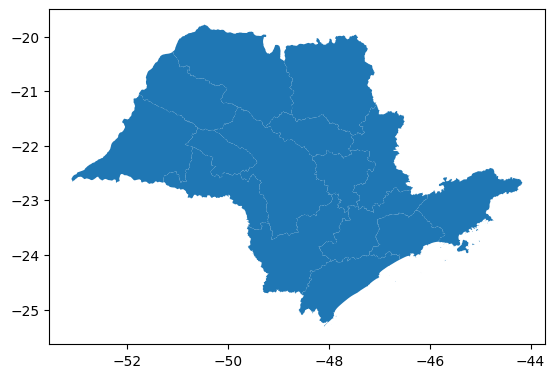

In [8]:
meso_sp.plot()

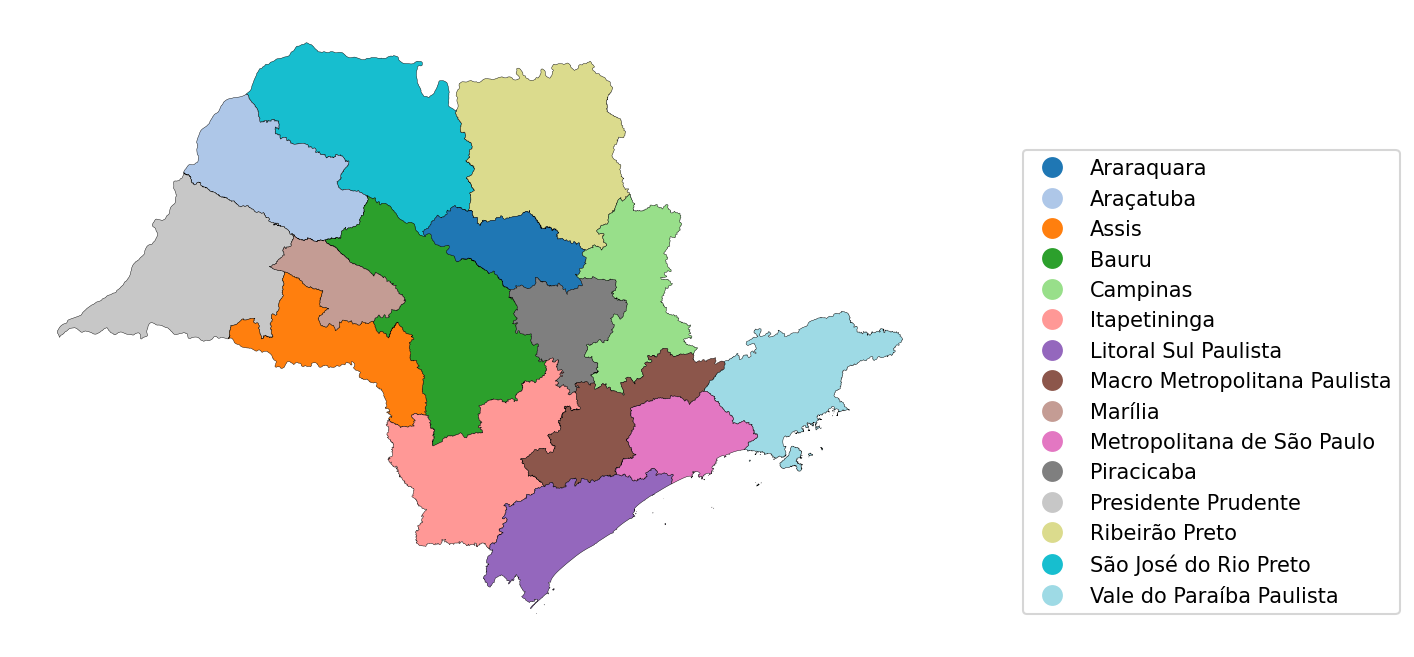

In [10]:
fig, ax = plt.subplots(figsize=(8,8), dpi=150)
meso_sp.plot(ax=ax, edgecolor='black',linewidth=0.2, column='NM_MESO', categorical=True, cmap = 'tab20',legend=True, legend_kwds=dict(loc='upper right', bbox_to_anchor=(1.5, 0.8)))
ax.axis('off')
fig.savefig('C:/Users/valer/OneDrive/Documentos/Python/Pyladies/Geopython/GeoPandas/DADOS/SAIDA/mesoregioes_sp.png',dpi=300, bbox_inches = 'tight')
plt.show()

Municípios

In [11]:
url = 'https://geoftp.ibge.gov.br/organizacao_do_territorio/malhas_territoriais/malhas_municipais/municipio_2022/Brasil/BR/BR_Municipios_2022.zip'
response = requests.get(url)
content = response.content
muni = gpd.read_file(io.BytesIO(content), sep=',', compression='gzip', index_col=0, quotechar='"')
muni.head()

C:\Users\valer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\pyogrio\raw.py:196: RuntimeWarning: driver ESRI Shapefile does not support open option SEP
  return ogr_read(
C:\Users\valer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\pyogrio\raw.py:196: RuntimeWarning: driver ESRI Shapefile does not support open option COMPRESSION
  return ogr_read(
C:\Users\valer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\pyogrio\raw.py:196: RuntimeWarning: driver ESRI Shapefile does not support open option INDEX_COL
  return ogr_read(
C:\Users\valer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\pyogrio\raw.py:196: RuntimeWarning: driver ESRI Shapefile does not support open option QUOTECHAR
  r

,CD_MUN,NM_MUN,SIGLA_UF,AREA_KM2,geometry
0,1100015,Alta Floresta D'Oeste,RO,7067.127,"POLYGON ((-62.00806 -12.13379, -62.00784 -12.2..."
1,1100023,Ariquemes,RO,4426.571,"POLYGON ((-63.17933 -10.13924, -63.17746 -10.1..."
2,1100031,Cabixi,RO,1314.352,"POLYGON ((-60.52408 -13.32137, -60.37162 -13.3..."
3,1100049,Cacoal,RO,3793.000,"POLYGON ((-61.35502 -11.50452, -61.35524 -11.5..."
4,1100056,Cerejeiras,RO,2783.300,"POLYGON ((-60.82135 -13.1191, -60.81773 -13.12..."


In [12]:
muni_sp = muni[muni.SIGLA_UF == 'SP']

In [13]:
muni_sp.head()

,CD_MUN,NM_MUN,SIGLA_UF,AREA_KM2,geometry
3267,3500105,Adamantina,SP,411.987,"POLYGON ((-51.09557 -21.57029, -51.09617 -21.5..."
3268,3500204,Adolfo,SP,211.055,"POLYGON ((-49.61249 -21.2611, -49.61249 -21.26..."
3269,3500303,Aguaí,SP,474.554,"POLYGON ((-47.01254 -22.00527, -47.01219 -22.0..."
3270,3500402,Águas da Prata,SP,142.673,"POLYGON ((-46.71875 -21.95837, -46.71878 -21.9..."
3271,3500501,Águas de Lindóia,SP,60.126,"POLYGON ((-46.61761 -22.51172, -46.61864 -22.5..."


<Axes: >

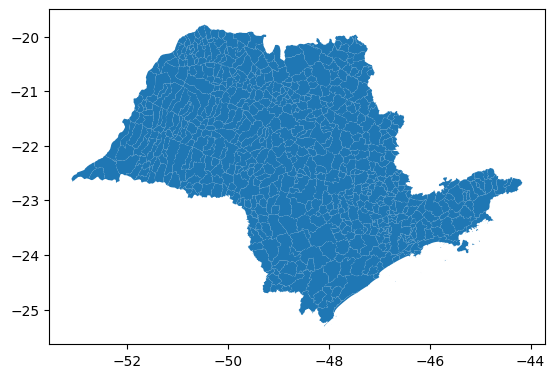

In [14]:
muni_sp.plot()


Censo 2022: População nos municípios paulistas

Fonte: https://repositorio.seade.gov.br/group/seade-censo-2022

In [15]:
url = 'https://repositorio.seade.gov.br/dataset/d95e88e0-cb9a-4a8f-b4ab-e247abe8d060/resource/2ffdf346-60ea-42d5-b687-a9666087834c/download/censo2022_populacao.csv'

response = requests.get(url, verify=False)
content = response.content
censo = pd.read_csv(io.BytesIO(content), sep=';', index_col=0, quotechar='"', encoding = 'latin1')

# O verify desativa a verificação do certificado SSL (Secure Sockets Layer) ao fazer a requisição HTTP com a biblioteca requests. Embora isso não seja recomendado para produção devido a questões de segurança, pode ser útil para testes ou em ambientes controlados.

C:\Users\valer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\urllib3\connectionpool.py:1099: InsecureRequestWarning: Unverified HTTPS request is being made to host 'repositorio.seade.gov.br'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


In [16]:
censo.head()

,municipio,censo2000,censo2010,censo2022,tc2000_2010,tc2010_2022
cod_ibge,,,,,,
3500105.0,Adamantina,33.497,33.797,34.687,"0,09","0,22"
3500204.0,Adolfo,3.684,3.557,4.351,"-0,35","1,69"
3500303.0,Aguaí,28.195,32.148,32.072,"1,32","-0,02"
3500402.0,Águas da Prata,7.131,7.584,7.369,"0,62","-0,24"
3500501.0,Águas de Lindóia,16.190,17.266,17.930,"0,65","0,31"


Para unir as tabelas, elas devem ter uma coluna em comum (com o mesmo nome e tipo).

In [17]:
print('Colunas da tabela de atributos dos municípios')
print(muni_sp.dtypes)
print("********")
print('Colunas da tabela do Censo')
print(censo.dtypes)

Colunas da tabela de atributos dos municípios
CD_MUN        object
NM_MUN        object
SIGLA_UF      object
AREA_KM2     float64
geometry    geometry
dtype: object
********
Colunas da tabela do Censo
municipio      object
censo2000      object
censo2010      object
censo2022      object
tc2000_2010    object
tc2010_2022    object
dtype: object


No dataframe censo, a coluna referente ao código do município está no índice e como float.

In [18]:
df_censo = censo.reset_index()
df_censo.head()

,cod_ibge,municipio,censo2000,censo2010,censo2022,tc2000_2010,tc2010_2022
0,3500105.0,Adamantina,33.497,33.797,34.687,"0,09","0,22"
1,3500204.0,Adolfo,3.684,3.557,4.351,"-0,35","1,69"
2,3500303.0,Aguaí,28.195,32.148,32.072,"1,32","-0,02"
3,3500402.0,Águas da Prata,7.131,7.584,7.369,"0,62","-0,24"
4,3500501.0,Águas de Lindóia,16.190,17.266,17.930,"0,65","0,31"


In [19]:
print('Colunas da tabela do Censo')
print(df_censo.dtypes)

Colunas da tabela do Censo
cod_ibge       float64
municipio       object
censo2000       object
censo2010       object
censo2022       object
tc2000_2010     object
tc2010_2022     object
dtype: object


In [20]:
cod_nan = df_censo['cod_ibge'].isna()  #conversão para inteiro não aceita nan
cod_nan

0      False
1      False
2      False
3      False
4      False
       ...  
642    False
643    False
644    False
645     True
646     True
Name: cod_ibge, Length: 647, dtype: bool

In [21]:
count_nan = cod_nan.sum()
count_nan

np.int64(2)

In [22]:
df_censo = df_censo.dropna(subset=['cod_ibge'])

In [23]:
df_censo['cod_ibge'] = df_censo['cod_ibge'].astype(int).astype(str)

In [24]:
print(df_censo.dtypes)
df_censo.head()

cod_ibge       object
municipio      object
censo2000      object
censo2010      object
censo2022      object
tc2000_2010    object
tc2010_2022    object
dtype: object


,cod_ibge,municipio,censo2000,censo2010,censo2022,tc2000_2010,tc2010_2022
0,3500105,Adamantina,33.497,33.797,34.687,"0,09","0,22"
1,3500204,Adolfo,3.684,3.557,4.351,"-0,35","1,69"
2,3500303,Aguaí,28.195,32.148,32.072,"1,32","-0,02"
3,3500402,Águas da Prata,7.131,7.584,7.369,"0,62","-0,24"
4,3500501,Águas de Lindóia,16.190,17.266,17.930,"0,65","0,31"


In [25]:
df_censo = df_censo.rename(columns={'cod_ibge': 'CD_MUN'}) #cuidado com espaços ao renomear colunas!

Atenção ao fazer as operações mantendo o mesmo nome do dataframe!!!

Leia [aqui](https://pandas.pydata.org/docs/user_guide/merging.html) sobre a combinação de tabelas.

In [26]:
uniao = pd.merge(df_censo, muni_sp, how = 'outer', on = 'CD_MUN') 

In [27]:
uniao.head()

,CD_MUN,municipio,censo2000,censo2010,censo2022,tc2000_2010,tc2010_2022,NM_MUN,SIGLA_UF,AREA_KM2,geometry
0,3500105,Adamantina,33.497,33.797,34.687,"0,09","0,22",Adamantina,SP,411.987,"POLYGON ((-51.09557 -21.57029, -51.09617 -21.5..."
1,3500204,Adolfo,3.684,3.557,4.351,"-0,35","1,69",Adolfo,SP,211.055,"POLYGON ((-49.61249 -21.2611, -49.61249 -21.26..."
2,3500303,Aguaí,28.195,32.148,32.072,"1,32","-0,02",Aguaí,SP,474.554,"POLYGON ((-47.01254 -22.00527, -47.01219 -22.0..."
3,3500402,Águas da Prata,7.131,7.584,7.369,"0,62","-0,24",Águas da Prata,SP,142.673,"POLYGON ((-46.71875 -21.95837, -46.71878 -21.9..."
4,3500501,Águas de Lindóia,16.190,17.266,17.930,"0,65","0,31",Águas de Lindóia,SP,60.126,"POLYGON ((-46.61761 -22.51172, -46.61864 -22.5..."


In [28]:
print(type(uniao))
print(type(muni_sp))

<class 'pandas.core.frame.DataFrame'>
<class 'geopandas.geodataframe.GeoDataFrame'>


O dataframe "uniao" tem a coluna chamada "geometry" mas a geometria não é reconhecida. Por isso, não é um geodataframe.

In [29]:
from geopandas import GeoDataFrame

In [30]:
gdf = GeoDataFrame(uniao,
                #    geometry='geometry'
                   )

In [31]:
print(type(gdf))

<class 'geopandas.geodataframe.GeoDataFrame'>


In [32]:
gdf.dtypes

CD_MUN           object
municipio        object
censo2000        object
censo2010        object
censo2022        object
tc2000_2010      object
tc2010_2022      object
NM_MUN           object
SIGLA_UF         object
AREA_KM2        float64
geometry       geometry
dtype: object

In [33]:
gdf.columns

Index(['CD_MUN', 'municipio', 'censo2000', 'censo2010', 'censo2022',
       'tc2000_2010', 'tc2010_2022', 'NM_MUN', 'SIGLA_UF', 'AREA_KM2',
       'geometry'],
      dtype='object')

In [34]:
# Substituir pontos (separadores de milhar) por nada e vírgulas (separadores decimais) por pontos

colunas = 'censo2000', 'censo2010', 'censo2022','tc2000_2010', 'tc2010_2022'

# Aplicar substituições e conversão somente nas colunas selecionadas
for coluna in colunas:
    if coluna in gdf.columns:
        gdf[coluna] = gdf[coluna].apply(lambda x: float(x.replace('.', '').replace(',', '.')) if isinstance(x, str) else x)

In [35]:
# Selecionar intervalo de colunas e converter para inteiro
gdf.iloc[:, 2:4] = gdf.iloc[:, 2:4].astype(int)
gdf.iloc[:, 5:6] = gdf.iloc[:, 5:6].astype(float)

In [36]:
gdf.dtypes

CD_MUN           object
municipio        object
censo2000       float64
censo2010       float64
censo2022       float64
tc2000_2010     float64
tc2010_2022     float64
NM_MUN           object
SIGLA_UF         object
AREA_KM2        float64
geometry       geometry
dtype: object

In [37]:
gdf.head()

,CD_MUN,municipio,censo2000,censo2010,censo2022,tc2000_2010,tc2010_2022,NM_MUN,SIGLA_UF,AREA_KM2,geometry
0,3500105,Adamantina,33497.0,33797.0,34687.0,0.09,0.22,Adamantina,SP,411.987,"POLYGON ((-51.09557 -21.57029, -51.09617 -21.5..."
1,3500204,Adolfo,3684.0,3557.0,4351.0,-0.35,1.69,Adolfo,SP,211.055,"POLYGON ((-49.61249 -21.2611, -49.61249 -21.26..."
2,3500303,Aguaí,28195.0,32148.0,32072.0,1.32,-0.02,Aguaí,SP,474.554,"POLYGON ((-47.01254 -22.00527, -47.01219 -22.0..."
3,3500402,Águas da Prata,7131.0,7584.0,7369.0,0.62,-0.24,Águas da Prata,SP,142.673,"POLYGON ((-46.71875 -21.95837, -46.71878 -21.9..."
4,3500501,Águas de Lindóia,16190.0,17266.0,17930.0,0.65,0.31,Águas de Lindóia,SP,60.126,"POLYGON ((-46.61761 -22.51172, -46.61864 -22.5..."


ATENÇÃO PARA A ORDEM DESSAS CONVERSÕES!!!

In [38]:
gdf.crs

<Geographic 2D CRS: EPSG:4674>
Name: SIRGAS 2000
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: Latin America - Central America and South America - onshore and offshore. Brazil - onshore and offshore.
- bounds: (-122.19, -59.87, -25.28, 32.72)
Datum: Sistema de Referencia Geocentrico para las AmericaS 2000
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [39]:
!pip install splot
from splot.mapping import vba_choropleth

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   ------- -------------------------------- 0.5/2.8 MB 4.2 MB/s eta 0:00:01
   ---------------------- ----------------- 1.6/2.8 MB 4.2 MB/s eta 0:00:01
   ------------------------------------- -- 2.6/2.8 MB 4.2 MB/s eta 0:00:01
   ---------------------------------------- 2.8/2.8 MB 4.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ------------------------ --------------- 1.0/1.7 MB 4.6 MB/s eta 0:00:01
   ------------------------------------ --- 1.6/1.7 MB 3.8 MB/s eta 0:00:01
   ---------------------------------------- 1.7/1.7 MB 3.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   -- ------------------------------------- 0.8/11.0 MB 4.2 MB/s eta 0:00:03
   ----- ---------------------------------- 1.6/11.0 MB 3.6 MB/s eta 0:00:03
   -------- ----------------

  You can safely remove it manually.
  You can safely remove it manually.


In [40]:
import matplotlib.colors as mcolors

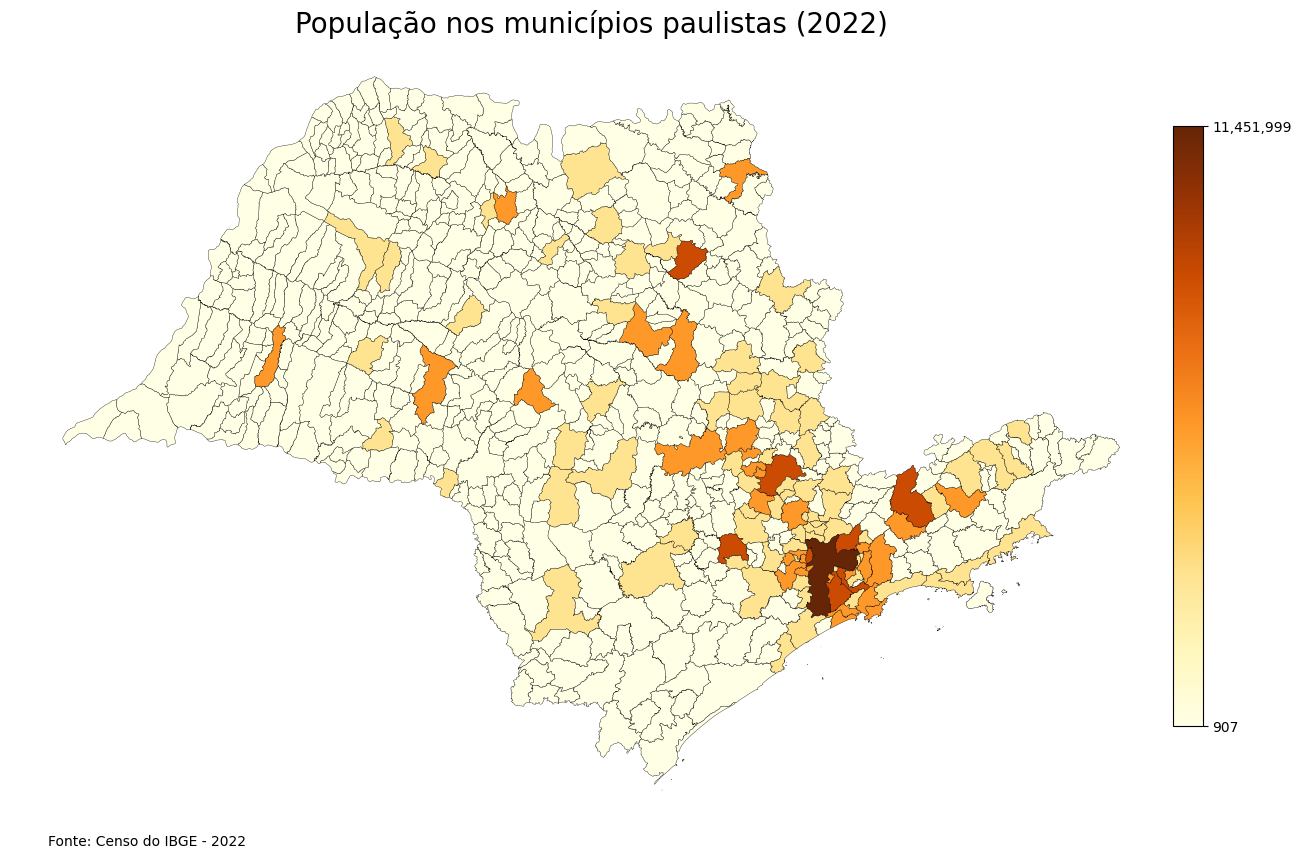

In [42]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 15)

# Plotar o mapa
gdf.plot(
    ax=ax,
    column='censo2022',
    cmap='YlOrBr',
    scheme='natural_breaks',
    edgecolor='black',
    linewidth=0.25
)

# Adicionar o eixo para a barra de cores
cax = fig.add_axes(
    [
        0.90,    # posição x (entre 0.0 e 1.0)
        0.30,    # posição y (entre 0.0 e 1.0)
        0.02,    # largura x
        0.40,    # altura y
    ]
)

# Configurar o ScalarMappable
sm = plt.cm.ScalarMappable(
    cmap='YlOrBr',
    norm=mcolors.Normalize(
        vmin=gdf['censo2022'].min(),  # Valor mínimo
        vmax=gdf['censo2022'].max(),  # Valor máximo
    ),
)

# Adicionar a barra de cores ao gráfico
cbar = fig.colorbar(
    sm,
    cax=cax
)

# Ajustar ticks da barra de cores para mostrar os valores reais
min_value = gdf['censo2022'].min()
max_value = gdf['censo2022'].max()
cbar.set_ticks([min_value, max_value])
cbar.set_ticklabels([f'{min_value:,.0f}', f'{max_value:,.0f}'])

# Configurar título e texto do gráfico
ax.set_title(
    'População nos municípios paulistas (2022)',
    fontdict={'fontsize': 20},
)

fig.text(
    0.15,                  # Posição x
    0.22,                  # Posição y
    'Fonte: Censo do IBGE - 2022'
)

# Remover eixos
ax.axis('off')

# Salvar o gráfico
fig.savefig('C:/Users/valer/OneDrive/Documentos/Python/Pyladies/Geopython/GeoPandas/DADOS/SAIDA/censo_sp_2022.png', dpi=300)

plt.show()

In [43]:
gdf.to_file('C:/Users/valer/OneDrive/Documentos/Python/Pyladies/Geopython/GeoPandas/DADOS/SAIDA/censo_sp_2022.shp')

C:\Users\valer\AppData\Local\Temp\ipykernel_15404\1166263096.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf.to_file('C:/Users/valer/OneDrive/Documentos/Python/Pyladies/Geopython/GeoPandas/DADOS/SAIDA/censo_sp_2022.shp')
C:\Users\valer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\pyogrio\raw.py:709: RuntimeWarning: Normalized/laundered field name: 'tc2000_2010' to 'tc2000_201'
  ogr_write(
C:\Users\valer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\pyogrio\raw.py:709: RuntimeWarning: Normalized/laundered field name: 'tc2010_2022' to 'tc2010_202'
  ogr_write(


In [44]:
gdf.crs

<Geographic 2D CRS: EPSG:4674>
Name: SIRGAS 2000
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: Latin America - Central America and South America - onshore and offshore. Brazil - onshore and offshore.
- bounds: (-122.19, -59.87, -25.28, 32.72)
Datum: Sistema de Referencia Geocentrico para las AmericaS 2000
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

**Exercício 1**

Faça o mapa da densidade demográfica nos municípios do estado de São Paulo para 2022.
Densidade = quantidade populacional / area

In [50]:
gdf['Densidade_Demografica'] = gdf['censo2022'] / gdf['AREA_KM2']
gdf.head(2)

,CD_MUN,municipio,censo2000,censo2010,censo2022,tc2000_2010,tc2010_2022,NM_MUN,SIGLA_UF,AREA_KM2,geometry,Densidade_Demograifca,Densidade_Demografica
0,3500105,Adamantina,33497.0,33797.0,34687.0,0.09,0.22,Adamantina,SP,411.987,"POLYGON ((-51.09557 -21.57029, -51.09617 -21.5...",84.194404,84.194404
1,3500204,Adolfo,3684.0,3557.0,4351.0,-0.35,1.69,Adolfo,SP,211.055,"POLYGON ((-49.61249 -21.2611, -49.61249 -21.26...",20.615479,20.615479


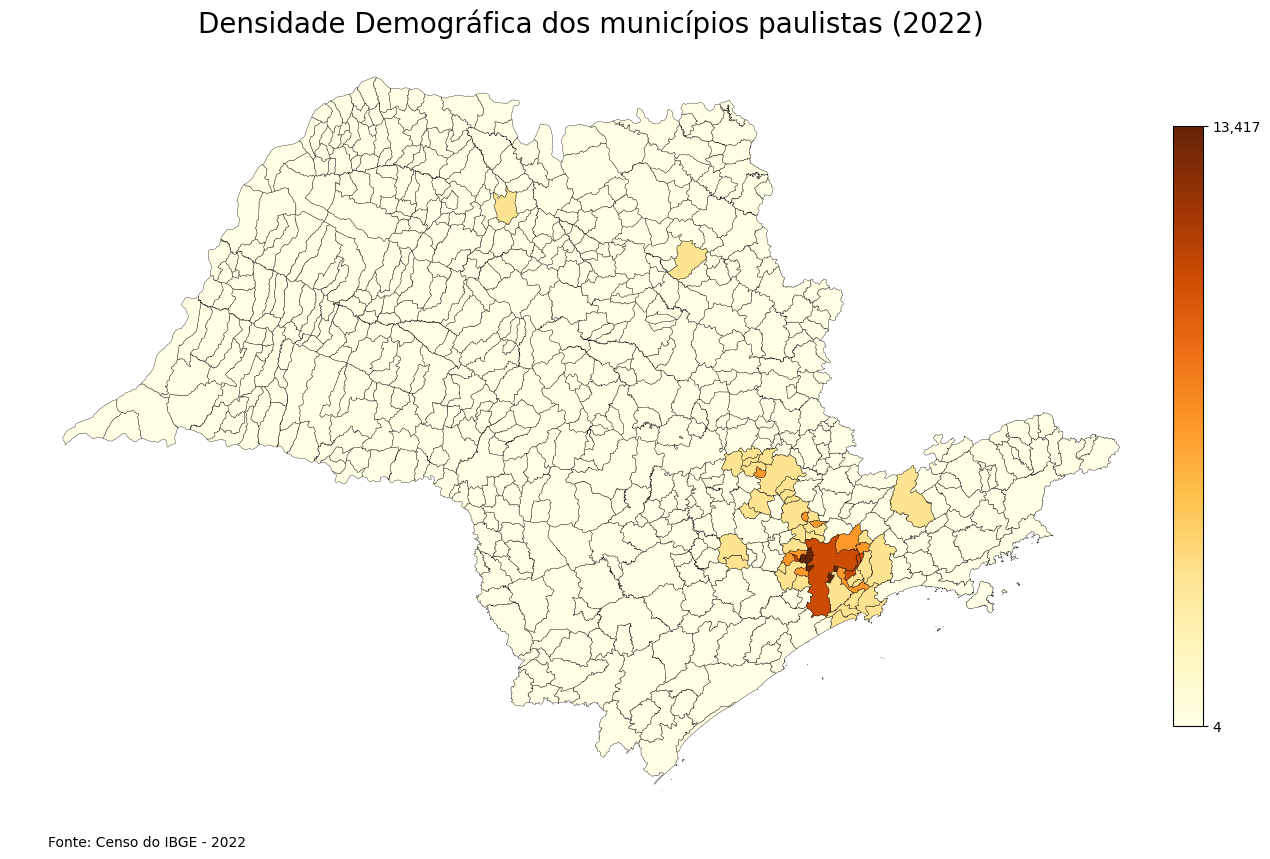

In [52]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 15)

# Plotar o mapa
gdf.plot(
    ax=ax,
    column='Densidade_Demografica',
    cmap='YlOrBr',
    scheme='natural_breaks',
    edgecolor='black',
    linewidth=0.25
)

# Adicionar o eixo para a barra de cores
cax = fig.add_axes(
    [
        0.90,    # posição x (entre 0.0 e 1.0)
        0.30,    # posição y (entre 0.0 e 1.0)
        0.02,    # largura x
        0.40,    # altura y
    ]
)

# Configurar o ScalarMappable
sm = plt.cm.ScalarMappable(
    cmap='YlOrBr',
    norm=mcolors.Normalize(
        vmin=gdf['Densidade_Demografica'].min(),  # Valor mínimo
        vmax=gdf['Densidade_Demografica'].max(),  # Valor máximo
    ),
)

# Adicionar a barra de cores ao gráfico
cbar = fig.colorbar(
    sm,
    cax=cax
)

# Ajustar ticks da barra de cores para mostrar os valores reais
min_value = gdf['Densidade_Demografica'].min()
max_value = gdf['Densidade_Demografica'].max()
cbar.set_ticks([min_value, max_value])
cbar.set_ticklabels([f'{min_value:,.0f}', f'{max_value:,.0f}'])

# Configurar título e texto do gráfico
ax.set_title(
    'Densidade Demográfica dos municípios paulistas (2022)',
    fontdict={'fontsize': 20},
)

fig.text(
    0.15,                  # Posição x
    0.22,                  # Posição y
    'Fonte: Censo do IBGE - 2022'
)

# Remover eixos
ax.axis('off')

# Salvar o gráfico
fig.savefig('C:/Users/valer/OneDrive/Documentos/Python/Pyladies/Geopython/GeoPandas/DADOS/SAIDA/densidade_2022.png', dpi=300)

plt.show()

**Exercício 2**

Coloque a unidade na barra de cores

cbar.set_label('População (milhares de pessoas)', rotation=270, labelpad=15)

In [53]:
gdf['pop_milhares'] = gdf['censo2022'] / 1000
gdf.head(2)

,CD_MUN,municipio,censo2000,censo2010,censo2022,tc2000_2010,tc2010_2022,NM_MUN,SIGLA_UF,AREA_KM2,geometry,Densidade_Demograifca,Densidade_Demografica,pop_milhares
0,3500105,Adamantina,33497.0,33797.0,34687.0,0.09,0.22,Adamantina,SP,411.987,"POLYGON ((-51.09557 -21.57029, -51.09617 -21.5...",84.194404,84.194404,34.687
1,3500204,Adolfo,3684.0,3557.0,4351.0,-0.35,1.69,Adolfo,SP,211.055,"POLYGON ((-49.61249 -21.2611, -49.61249 -21.26...",20.615479,20.615479,4.351


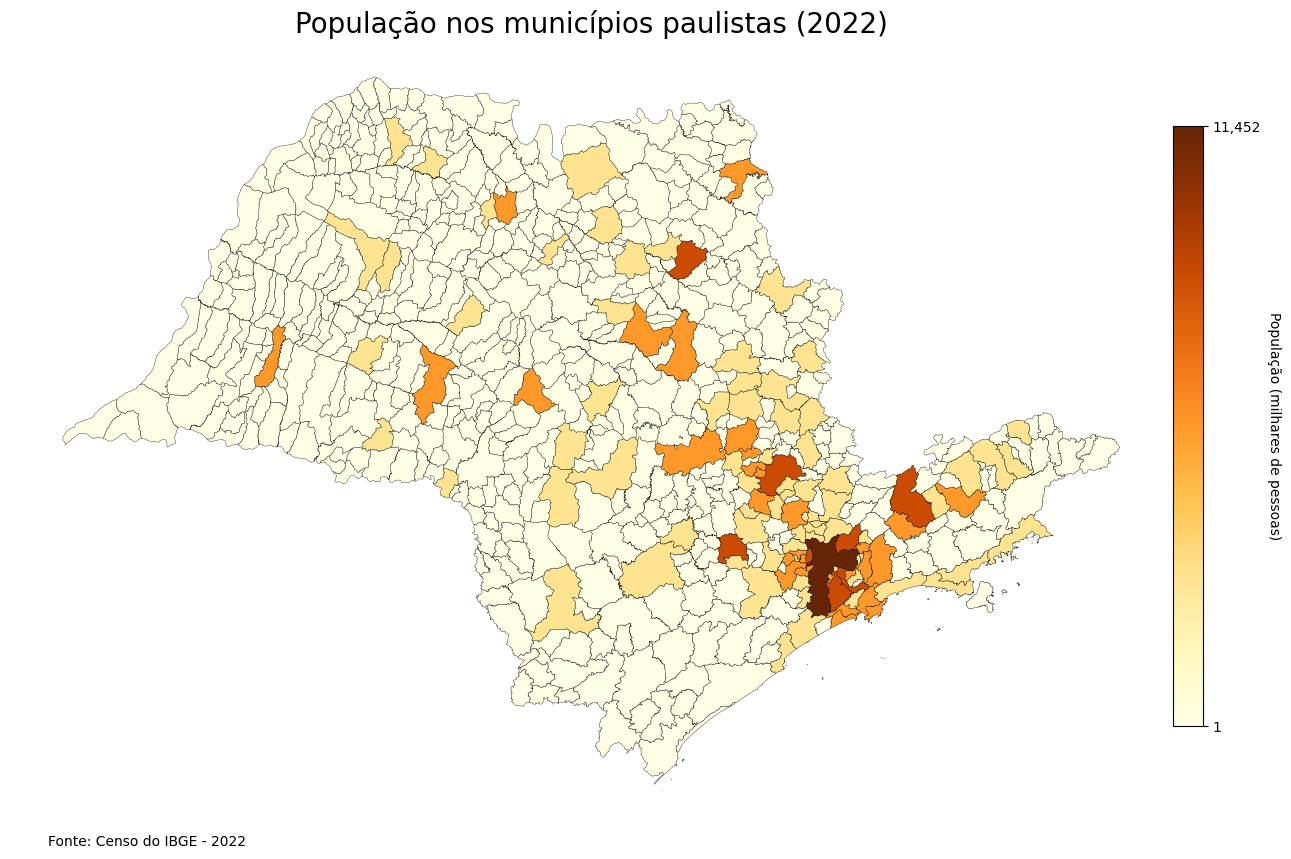

In [64]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 15)

# Plotar o mapa
gdf.plot(
    ax=ax,
    column='pop_milhares',
    cmap='YlOrBr',
    scheme='natural_breaks',
    edgecolor='black',
    linewidth=0.25
)

# Adicionar o eixo para a barra de cores
cax = fig.add_axes(
    [
        0.90,    # posição x (entre 0.0 e 1.0)
        0.30,    # posição y (entre 0.0 e 1.0)
        0.02,    # largura x
        0.40,    # altura y
    ]
)

# Configurar o ScalarMappable
sm = plt.cm.ScalarMappable(
    cmap='YlOrBr',
    norm=mcolors.Normalize(
        vmin=gdf['pop_milhares'].min(),  # Valor mínimo
        vmax=gdf['pop_milhares'].max(),  # Valor máximo
    ),
)

# Adicionar a barra de cores ao gráfico
cbar = fig.colorbar(
    sm,
    cax=cax
)
cbar.set_label('População (milhares de pessoas)', rotation=270, labelpad=15)

# Ajustar ticks da barra de cores para mostrar os valores reais
min_value = gdf['pop_milhares'].min()
max_value = gdf['pop_milhares'].max()
cbar.set_ticks([min_value, max_value])
cbar.set_ticklabels([f'{min_value:,.0f}', f'{max_value:,.0f}'])

# Configurar título e texto do gráfico
ax.set_title(
    'População nos municípios paulistas (2022)',
    fontdict={'fontsize': 20},
)

fig.text(
    0.15,                  # Posição x
    0.22,                  # Posição y
    'Fonte: Censo do IBGE - 2022'
)

# Remover eixos
ax.axis('off')

# Salvar o gráfico
fig.savefig('C:/Users/valer/OneDrive/Documentos/Python/Pyladies/Geopython/GeoPandas/DADOS/SAIDA/censo_sp_2022.png', dpi=300)

plt.show()